<a href="https://colab.research.google.com/github/tamaravera14/INVESTIGACION_DE_OPERACIONES/blob/main/Copia_de_DIBUJO_DE_REDES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dibujo de redes**
---
*Bazaldua Vera Tamara Alheli*

Dicha librería sirve para crear, analizar y visualizar networks y grafos complejos.
Es una librería especializada en trabajar con grafos y redes. Permite:
* Crear grafos dirigidos y no dirigidos.
* Agregar nodos y aristas con atributos (como capacity, weight, cost).
* Aplicar algoritmos clásicos:
    * Flujo máximo y corte mínimo
    * Caminos más cortos (Dijkstra, Bellman-Ford, Floyd-Warshall)
    * Árboles generadores mínimos
    * Centralidad, cliques, componentes conexas, etc.
* Visualizar grafos.

In [4]:
import networkx as nx

Crea directamente un grafo dirigido

In [5]:
G = nx.DiGraph() #grafo dirigido

Crea los arcos de un nodo a otro, donde (punto de partida, punto de llegada, capacidad).
Donde la capacidad suele usarse en problemas de flujo en redes (por ejemplo, flujo máximo, corte mínimo, transporte, logística, etc.).

In [6]:
G.add_edge("A","C", capacity = 5 ) # Crea un arco de A a C
G.add_edge("A","B", capacity = 5 ) # Crea un arco de A a B
G.add_edge("B","C", capacity = 5 ) # Crea un arco de B a C
G.add_edge("C","D", capacity = 5 ) # Crea un arco de C a D
G.add_edge("B","D", capacity = 5 ) # Crea un arco de B a D

Representa una gráfica de objeto creados usando NetworkX

In [7]:
G  # Muestra el tipo de clase

nx.draw_networkx(G): dibuja nodos, aristas y etiquetas de los nodos.
nx.draw_networkx(G, node_color="red"): Pinta todos los nodos de color rojo.

Por defecto:
* Los nodos aparecen como círculos.
* Las aristas como líneas negras. (edge_color=" ")
* Los nombres de los nodos se muestran como etiquetas.

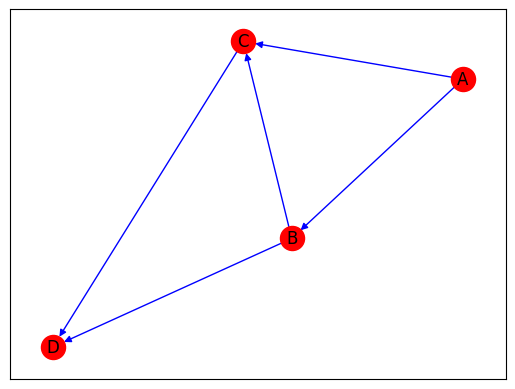

In [8]:
nx.draw_networkx(G, node_color="red", edge_color="blue") # Muestra la red creada en color rojo

Imprime una lista de los nodos en el grafo, el orden puede variar porque los nodos se van agregando automáticamente cuando añades aristas.
  * Una alternativa para este comando sería: print(G.nodes)

In [9]:
nx.nodes(G) # Muestra A, B, C, D que son los nodos definidos, o bien, usados en esta red

NodeView(('A', 'C', 'B', 'D'))

In [10]:
print(G.nodes)

['A', 'C', 'B', 'D']


Proporciona una vista de las aristas, devuelve un EdgeView.
Cada arista se representa como una tupla (u, v) donde **u** es el nodo de origen y **v** el nodo de destino.
  * Una alternativa es: **print(G.edges)**
  * En caso de también querer ver los atributos, en este caso la capacidad: **print(G.edges(data=True))**


In [11]:
nx.edges(G) # Muestra las aristas del grafo

OutEdgeView([('A', 'C'), ('A', 'B'), ('C', 'D'), ('B', 'C'), ('B', 'D')])

In [12]:
print(G.edges)

[('A', 'C'), ('A', 'B'), ('C', 'D'), ('B', 'C'), ('B', 'D')]


In [13]:
print(G.edges(data=True))

[('A', 'C', {'capacity': 5}), ('A', 'B', {'capacity': 5}), ('C', 'D', {'capacity': 5}), ('B', 'C', {'capacity': 5}), ('B', 'D', {'capacity': 5})]


Muestra el número de nodos de la red.
  * Equivale a hacer **len(G.nodes)** o **G.number_of_nodes()**.
  * Si agregas más aristas o nodos, este valor se actualizará automáticamente.

In [14]:
nx.number_of_nodes(G) # Número de nodos del grafo

4

In [15]:
len(G.nodes)

4

In [16]:
G.number_of_nodes()

4

# **Bordes**

Los bordes, también llamados aristas, son las líneas que conectan los nodos en un grafo. Su función principal es representar las relaciones o interacciones entre los objetos que los nodos simbolizan.

En teoría de grafos, los bordes pueden tener diferentes características:

* No dirigidos: indican una relación bidireccional entre los nodos.

* Dirigidos: señalan una relación con sentido, de un nodo origen a un nodo destino.

* Ponderados: incluyen un valor numérico (peso) que refleja la intensidad, el costo o la capacidad de la relación.

* Múltiples: en algunos grafos se permiten varios bordes entre el mismo par de nodos.

En NetworkX, existen varias formas de agregar bordes:

1. Al crear el grafo, pasando listas de aristas.

2. Mediante funciones, como add_edge(u, v) para un borde simple o add_edges_from([(u1, v1), (u2, v2), ...]) para varios.

3. Asignando atributos, como pesos, etiquetas o colores, al momento de añadirlos.

De esta manera, los bordes no solo definen la estructura del grafo, sino también la naturaleza de las relaciones representadas.

Los bordes, también llamados aristas, son las líneas que conectan los nodos en un grafo. Representan las relaciones o interacciones entre los objetos que los nodos representan. Hay varias formas de agregar bordes en NetworkX.

In [19]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*: desempaqueta la tupla

In [20]:
G.add_edges_from([(1, 2), (1, 3)]) # Lista de aristas

Supongamos que tenemos un grafo H con un conjunto de conexiones ya definidas y deseamos que otro grafo G tenga exactamente las mismas aristas.

La forma más rápida de lograrlo es copiar directamente las conexiones de H hacia G. En otras palabras, es como hacer un "copiar y pegar" de las relaciones entre nodos.

En NetworkX, esto se puede hacer de varias maneras, por ejemplo:

In [22]:
# Grafo original H con algunas aristas
H = nx.Graph()
H.add_edges_from([(1, 2), (2, 3), (3, 4)])

# Crear un nuevo grafo G copiando las aristas de H
G = nx.Graph()
G.add_edges_from(H.edges())

print("Aristas de G:", G.edges())


Aristas de G: [(1, 2), (2, 3), (3, 4)]


**Vaciar un grafo**

En ocasiones es necesario eliminar todos los nodos y aristas de un grafo para reutilizar su estructura sin conservar ninguna de sus conexiones.
Una manera sencilla de lograrlo es vaciar el grafo por completo, es decir, dejarlo en un estado inicial como si acabara de ser creado.

In [23]:
G.clear()

Aqui creamos un objeto de grafo dirigido, en un grafo dirigido las conexiones (bordes) tienen una dirección.

In [33]:
# Grafo dirigido
G = nx.DiGraph()
G.add_edges_from([("A", "C"), ("A", "B")])

**Uso de assert y sucesores en un grafo dirigido**

La palabra clave **assert** se utiliza para verificar que una condición se cumpla durante la ejecución del programa.
Si la condición especificada es falsa, el programa se detiene y muestra un error; en cambio, si es verdadera, el programa continúa normalmente.

En un grafo dirigido (**DiGraph**) de NetworkX, la función **DG.successors(n)** devuelve la lista de nodos a los que el nodo n apunta, es decir, sus sucesores.

Por ejemplo, si en el grafo DG agregamos las aristas (3, 5) y (5, 4), entonces:

* El nodo 5 se conecta hacia los nodos 3 y 4.

* Por lo tanto, DG.successors(5) devuelve [3, 4].

* La condición en el assert se cumple y el programa continúa sin problemas.

In [34]:
assert list(G.successors("A")) == ["C", "B"]
print("Los sucesores de A son:", list(G.successors("A")))

Los sucesores de A son: ['C', 'B']


list(DG.edges): Esta función te da una lista de todos los bordes en el grafo dirigido, en el orden en que fueron creados.

In [36]:
# Verificamos que las aristas sean exactamente esas
assert list(G.edges) == [("A", "C"), ("A", "B")]
print("Las aristas son:", list(G.edges))

Las aristas son: [('A', 'C'), ('A', 'B')]


---

# **Actividad**

---

# **Árbol de Expansión Mínima**



Con este método lo que buscamos es la **ruta de mínimos costos**.
Podemos resolver este problema con un algoritmo.

Sea $N = \{1, 2, \ldots, n\}$ el conjunto de nodos de la red.

$C_k =$ Conjunto de nodos que se han conectado de forma permanente en la iteración $k$.

$\bar{C}_k =$ Conjunto de nodos que todavía se deben conectar en forma permanente.

---

**Paso 0.** Hacer $C_0 = \varnothing$ y $\bar{C}_0 = N$.

**Paso 1.** Comenzar con cualquier nodo $i$ en $\bar{C}_0$ e igualar
$C_1 = \{i\}$ y $\bar{C}_1 = N - \{i\}$.  
Hacer $k = 2$.

**Paso k.** Seleccionar el nodo $j^* \in \bar{C}_{k-1}$ que produzca el arco más corto a un nodo en $C_{k-1}$.

Enlazar a $j^*$ en forma permanente con $C_{k-1}$ y sacarlo de $\bar{C}_{k-1}$, esto es:

$$C_k = C_{k-1} \cup \{j^*\}$$

$$\bar{C}_k = \bar{C}_{k-1} - \{j^*\}$$

Si $\bar{C}_k = \varnothing$, detenerse.

**Otro caso:** Hacer $k \gets k+1$ y repetir el paso.

Sin embargo, tenemos la libreria de Networkx para facilitar estos algoritmos.

### **Ejemplo**

***Una compañía de Tv quiere proporcionar servicio de cable a 5 nuevas áreas habitacionales. La figura muestra las conexiones posibles a distancia está en millas.***

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

Asignamos las conexiones del árbol de expansión donde la fórmula es:
**(nodo_origen, nodo_destino, peso)**

In [72]:
aristas_peso = [
    (1, 2, 1),
    (1, 3, 5),
    (1, 4, 7),
    (1, 5, 9),
    (2, 4, 4),
    (2, 5, 3),
    (2, 3, 6),
    (3, 4, 6),
    (3, 6, 10),
    (4, 6, 3),
    (4, 5, 8)
]

G.add_weighted_edges_from(aristas_peso) # Añadimos todas las aristas y sus pesos

In [75]:
# Posiciones fijas para dibujar, definimos la posición de los nodos (Layout), los valores son coordenadas (x, y) relativas.

pos_fij = {
    1: (1, 4),
    2: (3, 7),
    3: (6, 5),
    4: (4, 1),
    5: (9, 7),
    6: (9, 4)
}

# Obtenemos las etiquetas de los pesos de las aristas, crea un diccionario donde la a es la arista (a, b) y b el valor es el peso.

edge_labels = nx.get_edge_attributes(G, 'weight')

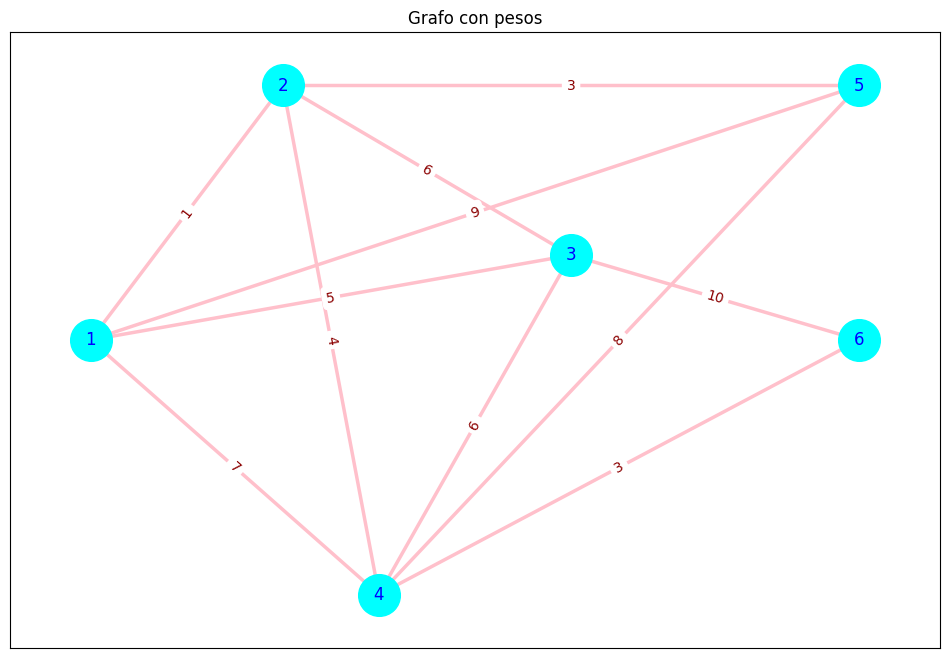

In [76]:
plt.figure(figsize=(12, 8))
# Dibujar los nodos (círculos)
nx.draw_networkx_nodes(G, pos_fij, node_size=900, node_color='cyan')

# Dibujar las aristas
nx.draw_networkx_edges(G, pos_fij, width=2.5, edge_color='pink')

# Dibujar las etiquetas de los nodos (los números 1 a 6)
nx.draw_networkx_labels(G, pos_fij, font_size=12, font_color='blue')

# Dibujar los pesos de las aristas-> draw_networkx_edge_labels es clave para mostrar los números en las líneas.
nx.draw_networkx_edge_labels(G, pos_fij, edge_labels=edge_labels, font_color='darkred', font_size=10)

# Configuraciones finales para limpiar el gráfico
plt.title("Grafo con pesos")
plt.show()

**nx.minimum_spanning_tree(G)**

Es la funcion que nos ayuda a calcular el Árbol de Expansión Mínima

In [77]:
# --- Árbol de Expansión Mínima (AEM) ----------------------------------------
AEM = nx.minimum_spanning_tree(G)
print("Aristas del MST con pesos:", list(AEM.edges(data=True)))

Aristas del MST con pesos: [(1, 2, {'weight': 1}), (1, 3, {'weight': 5}), (2, 5, {'weight': 3}), (2, 4, {'weight': 4}), (4, 6, {'weight': 3})]


---

**Opción 1**

---
Dibujamos SOLO el Árbol de Expansión Mínima (AEM)

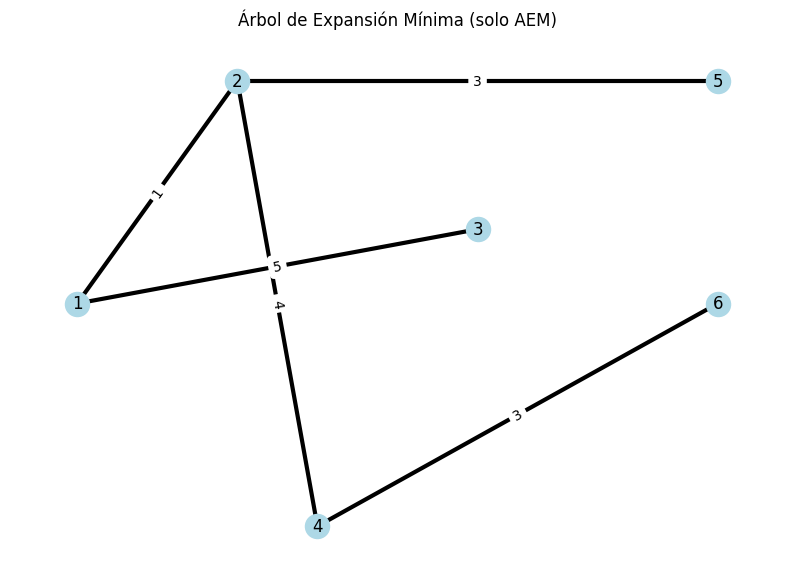

In [81]:
plt.figure(figsize=(10, 7))
nx.draw_networkx(AEM, pos_fij, node_color="lightblue", with_labels=True, width=3)
nx.draw_networkx_edge_labels(
    AEM, pos_fij, edge_labels=nx.get_edge_attributes(AEM, "weight"), font_size=10
)
plt.title("Árbol de Expansión Mínima (solo AEM)")
plt.axis("off")
plt.show()

---

**Opción 2**

---

Podemos resaltar el AEM sobre el grafo completo

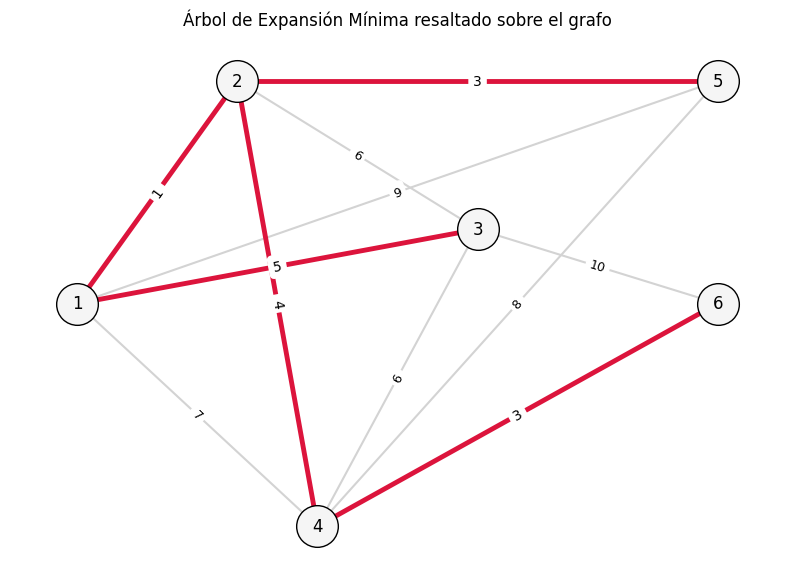

In [79]:

plt.figure(figsize=(10, 7))
# 1. Grafo completo en gris claro
nx.draw_networkx_nodes(G, pos_fij, node_size=900, node_color="whitesmoke", edgecolors="k")
nx.draw_networkx_edges(G, pos_fij, width=1.5, edge_color="lightgray")
nx.draw_networkx_labels(G, pos_fij, font_size=12)
nx.draw_networkx_edge_labels(G, pos_fij, edge_labels=edge_labels, font_size=9)

# 2. MST encima en rojo y más grueso
nx.draw_networkx_edges(AEM, pos_fij, width=3.5, edge_color="crimson")
nx.draw_networkx_edge_labels(
    AEM, pos_fij, edge_labels=nx.get_edge_attributes(AEM, "weight"), font_size=10
)

plt.title("Árbol de Expansión Mínima resaltado sobre el grafo")
plt.axis("off")
plt.show()

In [80]:
# Usamos la función minimum_spanning_tree para calcular el Árbol de Expansión Mínima
AEM = nx.minimum_spanning_tree(G)
# Calcular el peso total del Árbol de Expansión Mínima
costo_total_minimo = AEM.size(weight='weight')

print(f"Las aristas del Árbol de Expansión Mínima son: {AEM.edges(data=True)}")
print(f"El Costo Total Mínimo (Árbol de Expansión Mínima) es: {costo_total_minimo}")

Las aristas del Árbol de Expansión Mínima son: [(1, 2, {'weight': 1}), (1, 3, {'weight': 5}), (2, 5, {'weight': 3}), (2, 4, {'weight': 4}), (4, 6, {'weight': 3})]
El Costo Total Mínimo (Árbol de Expansión Mínima) es: 16.0


---

# **Ruta más corta**

---

**Algoritmo de Dijkstra**

Se basa en definir la etiqueta
$$
[u_j, i] = [u_i + d_{ij}, i], \quad d_{ij} \geq 0
$$
donde $u_i$ es la distancia más corta anterior y $d_{ij}$ es la longitud del arco $(i,j)$.

---

**Paso 0.** Asignar la etiqueta permanente $[0, -]$ al nodo $1$.  
Hacer $i = 1$.

**Paso i.**  

a) Calcular las etiquetas ***temporales*** $[u_i + d_{ij}, i]$ para cada nodo $j$ al que pueda llegarse desde $i$, siempre y cuando $j$ no tenga etiqueta ***permanente***.  
Si $j$ ya tiene la etiqueta $[u_j, k]$ por otro nodo $k$ y $u_i + d_{ij} < u_j$, sustituir $[u_j, k]$ por $[u_i + d_{ij}, i]$.

b) Si todos los nodos tienen etiquetas permanentes, detenerse.

**Otro caso:** Seleccionar la etiqueta $[u_r, s]$ que tenga la distancia más corta ($u_r$) entre todas las etiquetas (los empates se rompen en forma arbitraria).  
Hacer $i = r$ y repetir el paso i.


---

***Ejemplo***

---

La red muestra las rutas entre la ciudad 1 y otras 4 ciudades. Determinar la ruta mas corta entre  y cada una de las otras ciudades.

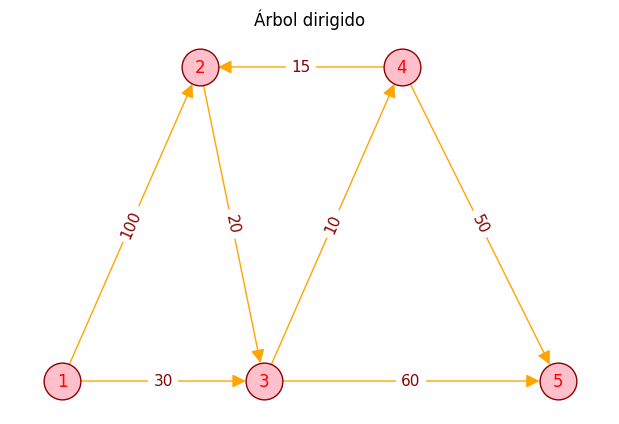

In [98]:

import networkx as nx
import matplotlib.pyplot as plt

# Grafo del árbol
T = nx.DiGraph()
T.add_weighted_edges_from([
    (1, 2, 100),
    (1, 3, 30),
    (2, 3, 20),
    (3, 4, 10),
    (4, 2, 15),
    (3, 5, 60),
    (4, 5, 50)
])

# Posiciones para que se parezca al croquis
pos = {
    1: (0.0, 0.0),
    2: (1.5, 0.5),
    3: (2.2, 0.0),
    4: (3.7, 0.5),
    5: (5.4, 0.0),
}

plt.figure(figsize=(6, 3.8))
nx.draw(
    T, pos,
    with_labels=True,
    node_size=700,
    node_color="pink",
    edgecolors="darkred",
    arrowsize=20,
    font_size=12,
    font_color='red',
    edge_color="orange"
)

# Etiquetas de aristas con los pesos
edge_labels = {(u, v): w for u, v, w in T.edges(data="weight")}
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels, font_size=11, font_color="darkred")

plt.title("Árbol dirigido")
plt.axis("off")
plt.show()

In [105]:
import networkx as nx

DG = nx.DiGraph()
DG.add_weighted_edges_from([
    (1, 2, 100),
    (1, 3, 30),
    (2, 3, 20),
    (3, 4, 10),
    (4, 2, 15),
    (4, 5, 50),
    (3, 5, 60),
])

# Árbol de rutas más cortas desde 1
dist, paths = nx.single_source_dijkstra(DG, source=1, weight='weight')

# Construir las aristas del árbol a partir de los paths
tree_edges = set()
for v, p in paths.items():
    if len(p) >= 2:
        tree_edges.add((p[-2], p[-1]))

print("Distancias:", dist)
print("Aristas del árbol:", tree_edges)

# Verificación (aceptando cualquiera de las dos opciones para llegar a 5)
opc1 = {(1,3), (3,4), (4,2), (3,5)}
opc2 = {(1,3), (3,4), (4,2), (4,5)}
assert tree_edges in (opc1, opc2)


Distancias: {1: 0, 3: 30, 4: 40, 2: 55, 5: 90}
Aristas del árbol: {(3, 5), (1, 3), (3, 4), (4, 2)}


In [104]:
# Ruta más corta
ruta = nx.shortest_path(DG, source=1, target=5, weight="weight")
#Creamos la ruta, con ayuda de la libreria correspondiente, además calculamos la ruta más corta desde el nodo A hasta D (en este caso).
distancia = nx.shortest_path_length(DG, source=1, target=5, weight="weight")
#Se calcula la distancia de la ruta mas corta sumando las capacidades correspondientes.
print("Ruta más corta de A a D:", ruta)
print("Distancia mínima entre A y D:", distancia)
#Finalmente se imprime la ruta mas corta y la distancia minima.

Ruta más corta de A a D: [1, 3, 5]
Distancia mínima entre A y D: 90
